In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cv2
import time
from scipy.ndimage import binary_fill_holes

# A.2

In [2]:
def get_points(im1, im2, n_pts):
    pts_a = []
    pts_b = []
    for i in range(n_pts):
        plt.figure(figsize=(30,30))
        plt.imshow(np.flip(im1, axis=2))
        pa = plt.ginput(1)
        plt.close()

        pts_a.append(pa[0])

        plt.figure(figsize=(30,30))
        plt.imshow(np.flip(im2, axis=2))
        pb = plt.ginput(1)
        plt.close()

        pts_b.append(pb[0])

    return pts_a, pts_b

def plot_correspondences(im1, im1_pts, im2, im2_pts, path):
    im1_x = [x[0] for x in im1_pts]
    im1_y = [x[1] for x in im1_pts]

    im2_x = [x[0] for x in im2_pts]
    im2_y = [x[1] for x in im2_pts]

    cmap = mpl.colormaps['hsv']
    colors = cmap(np.linspace(0, 1, len(im1_pts)))

    plt.figure()
    plt.imshow(np.flip(im1, axis=2))
    plt.scatter(im1_x, im1_y, c=colors)
    plt.axis('off')
    plt.savefig(path+"_1_correspondences.jpg", bbox_inches="tight")
    plt.show()

    plt.figure()
    plt.imshow(np.flip(im2, axis=2))
    plt.scatter(im2_x, im2_y, c=colors)
    plt.axis('off')
    plt.savefig(path+"_2_correspondences.jpg", bbox_inches="tight")
    plt.show()
    return None

def compute_h(im1_pts, im2_pts):
    # let im1_pts = x,y
    # let im2_pts = u,v
    length = len(im1_pts) * 2
    A = np.zeros((length,8))
    b = np.zeros(length)
    for i in range(len(im1_pts)):
        x,y = im1_pts[i]
        u,v = im2_pts[i]
        A[i*2] = [x,y,1,0,0,0,-u*x,-u*y]
        A[(i*2)+1] = [0,0,0,x,y,1,-v*x,-v*y]
        b[i*2] = u
        b[(i*2)+1] = v
    h = np.linalg.lstsq(A, b, rcond=None)
    return A, b, h

def recover_homographies(im1_to_warp, im2, n_pts, save_path):
    %matplotlib tk
    pts_a, pts_b = get_points(im1_to_warp, im2, n_pts)
    plot_correspondences(im1_to_warp, pts_a, im2, pts_b, path=save_path)
    A, b, h = compute_h(pts_a, pts_b)
    return pts_a, pts_b, A, b, np.append(h[0],1)

In [3]:
trex_low = cv2.imread("images/trex_1.jpeg")
trex_high = cv2.imread("images/trex_2.jpeg")

pts_a, pts_b, A, b, trex_h = recover_homographies(trex_high,trex_low, n_pts=8, save_path="image_results/trex")

: 

: 

In [90]:
A, b,

(array([[ 4.21954280e+02,  6.35824764e+02,  1.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         -1.69695052e+05, -2.55706178e+05],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          4.21954280e+02,  6.35824764e+02,  1.00000000e+00,
         -1.23946992e+05, -1.86770393e+05],
        [ 5.30797818e+02,  6.52787393e+02,  1.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         -2.72742597e+05, -3.35425133e+05],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          5.30797818e+02,  6.52787393e+02,  1.00000000e+00,
         -1.64922971e+05, -2.02826072e+05],
        [ 6.28332936e+02,  9.22775908e+02,  1.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         -3.87696826e+05, -5.69375358e+05],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          6.28332936e+02,  9.22775908e+02,  1.00000000e+00,
         -3.47106929e+05, -5.09764638e+05],
        [ 4.0499

In [3]:
trex_pts_a = [(421.954280413464, 635.8247636717024),
 (530.79781782843, 652.7873928792296),
 (628.3329357717112, 922.7759077657037),
 (404.99165120593676, 559.4929322378302),
 (315.9378478664192, 545.3574078982242),
 (1056.639323261772, 500.1237300114851),
 (421.954280413464, 491.6424154077215),
 (198.61299584768966, 826.6543422563831)]

trex_pts_b = [(402.16454633801555, 293.7450746532379),
 (513.8351886209027, 310.70770386076504),
 (617.0245163000263, 552.4251700680272),
 (376.7206025267248, 213.17258591748384),
 (277.7719321494831, 199.03706157787792),
 (1055.2257708278114, 143.9085166534146),
 (385.2019171304884, 139.6678593515328),
 (207.09431045145328, 476.093338634155)]
trex_h = np.array([ 1.39246665e+00,  3.52888172e-01, -2.70015416e+02, -1.23373911e-03,
        1.52096976e+00, -5.70491940e+02,  4.23001768e-05,  5.21205523e-04,
        1.00000000e+00])

# A.3

In [4]:
def warp_image(im,H, method):
    
    H = np.array(H)
    H = H.reshape(3,3)
    H_inv = np.linalg.inv(H)

    height = im.shape[0]
    width = im.shape[1]

    # get bounding box
    # top left, top right, bottom left, bottom right
    corners = np.array([[0,0,1], [width-1, 0, 1], [0, height-1, 1], [width-1, height-1, 1]])

    bounding_box = []
    for c in corners:
        transformed_corner = np.matmul(H, c)
        bounding_box.append(transformed_corner / transformed_corner[2])

    # find boundary values
    x_boundary = [x[0] for x in bounding_box]
    y_boundary = [x[1] for x in bounding_box]

    min_y, min_x = np.floor(min(y_boundary)), np.floor(min(x_boundary))
    max_y, max_x = np.ceil(max(y_boundary)), np.ceil(max(x_boundary))

    i_range = int(np.ceil(max_y) - np.floor(min_y))
    j_range = int(np.ceil(max_x) - np.floor(min_x))

    output_img = np.zeros((i_range, j_range))
    # homography matrix does coordinates in x,y,1 order

    for i in range(i_range):
        for j in range(j_range):
            coord = [j+min_x,i+min_y,1]
            back_coord = np.matmul(H_inv, coord)
            rounded_coord = back_coord / back_coord[2]
            # do interpolation here
            match method:
                case "nn":
                    # nearest neighbor: round the pixel to the nearest integer value
                    x, y = [int(np.floor(rounded_coord[0])), int(np.floor(rounded_coord[1]))]
                    if (0 <= x < width) and (0 <= y < height):
                        output_img[i,j] = im[y, x]
                case "bilinear":
                    # get four closest points
                    x,y = rounded_coord[0], rounded_coord[1]

                    if ~((0 <= x < width) and (0 <= y < height)):
                        continue

                    j1 = np.floor(x)
                    j2 = j1 + 1 
                    i1 = np.floor(y)
                    i2 = i1 + 1 
                    nearest_points = [(i1, j1),(i1, j2), (i2, j1), (i2, j2)]
                    weights = np.array([
                        (j2 - x)*(i2-y),
                        (x - j1)*(i2-y),
                        (j2-x)*(y-i1),
                        (x-j1)*(y-i1)
                    ])

                    # weights = weights / ((j2-j1)*(i2-i2)) # normalize
                    in_range = []
                    js = []
                    i_s = []
                    for p in range(len(nearest_points)):
                        near_y = int(nearest_points[p][0])
                        near_x = int(nearest_points[p][1])
                        if (0 <= near_x < width) and (0 <= near_y < height):
                            in_range.append(p)
                            js.append(near_x)
                            i_s.append(near_y)
                    weighted_avg = 0.0
                    j_diff = max(js) - min(js) if max(js) != min(js) else abs(x-max(js))
                    i_diff = max(i_s) - min(i_s) if max(i_s) != min(i_s) else abs(x-max(i_s))
                    normalizing_constant = j_diff * i_diff
                    weights = weights / normalizing_constant
                    for p in in_range:
                        ni = int(nearest_points[p][0])
                        nj = int(nearest_points[p][1])
                        weighted_avg += im[ni, nj]*weights[p]

                    output_img[i,j] = weighted_avg
            
    return output_img, (min_x, min_y, max_x, max_y)

def warp_bgr_image(bgr_im_to_warp, fixed_im, H, method):
    aligned_im = []
    mask = []
    for i in range(bgr_im_to_warp.shape[2]):
        channel = bgr_im_to_warp[:,:,i]
        output, corners = warp_image(channel, H, method=method)
        alignment = place_images(fixed_im[:,:,i], output, corners[0], corners[1], corners[2], corners[3])
        mask.append(alignment[-1])
        alignment = alignment[:-1]
        aligned_im.append(alignment)

    masks = sum(mask)
    masks[masks >= 1] = 1
    masks[masks < 1] = 0
    warped_channels = [x[0] for x in aligned_im]
    fixed_channels = [x[1] for x in aligned_im]
    warped_stack = np.dstack([x.astype(np.uint8) for x in warped_channels])
    fixed_stack = np.dstack([x.astype(np.uint8) for x in fixed_channels])
    return warped_stack, fixed_stack, masks


def place_images(im_fixed, im_warped, min_x, min_y, max_x, max_y):
    height = im_fixed.shape[0]
    width = im_fixed.shape[1]

    height2 = im_warped.shape[0]
    width2 = im_warped.shape[1]

    # get size of bounding box for both img
    min_x_all = np.floor(min(0, min_x))
    min_y_all = np.floor(min(0, min_y)) 
    max_x_all = np.ceil(max(width, max_x))
    max_y_all = np.ceil(max(height, max_y))

    # canvas needs to be large enough to hold both images so i can place them and tell if theyre warped right or im going crazy
    i_range = int(max_y_all - min_y_all)
    j_range = int(max_x_all - min_x_all)

    # put im1
    x_offset_fixed = int(-min_x_all)
    y_offset_fixed = int(-min_y_all)
    
    im_fixed_placed = np.zeros((i_range, j_range))
    im_fixed_placed[y_offset_fixed:y_offset_fixed+height, x_offset_fixed:x_offset_fixed+width] = im_fixed

    # put im2_warped
    x_offset_warped = int(np.floor(min_x) - min_x_all)
    y_offset_warped = int(np.floor(min_y) - min_y_all)

    im_warped_placed = np.zeros((i_range, j_range))
    im_warped_placed[y_offset_warped:y_offset_warped+height2, x_offset_warped:x_offset_warped+width2] = im_warped

    mask = make_mask_on_fixed_fish(im_warped_placed)

    return im_warped_placed, im_fixed_placed, mask

def make_mask_from_images_box(shape, y_min_can, y_max_can, x_min_can, x_max_can, y_min_warp, y_max_warp, x_min_warp, x_max_warp):
    fixed_mask = np.zeros(shape, dtype=bool)
    fixed_mask[:,:] = False
    fixed_mask[y_min_can:y_max_can, x_min_can:x_max_can] = True
    warped_mask = np.zeros(shape, dtype=bool)
    warped_mask[:,:] = False
    warped_mask[y_min_warp:y_max_warp, x_min_warp:x_max_warp] = True
    mask = fixed_mask & warped_mask
    mask[mask == False] = 0
    mask[mask == True] = 1
    return mask

def make_mask_on_fixed(end_shape, height, width, x_offset, y_offset):
    mask = np.zeros(end_shape)
    mask_int = mask.astype(int)
    shrink = 20
    mask[y_offset+shrink:y_offset+height-shrink,x_offset+shrink:x_offset+width-shrink] = 1
    return mask


def make_mask_on_fixed_fish(warped_im):
    # im1_bool = (warped_im != 0)
    # im2_bool = (im2_placed != 0)
    mask = (warped_im != 0)
    mask_int = mask.astype(np.uint8)
    shrink = 50
    mask_int = cv2.erode(mask_int, kernel=np.ones((30,30)))
    filled_mask = binary_fill_holes(mask_int)
    return filled_mask

In [5]:
%matplotlib inline
trex_high = cv2.imread("images/trex_2.jpeg")
trex_low = cv2.imread("images/trex_1.jpeg")
warped_im_trex, fixed_im_trex, trex_mask_generated = warp_bgr_image(trex_high, trex_low, trex_h, method="nn")



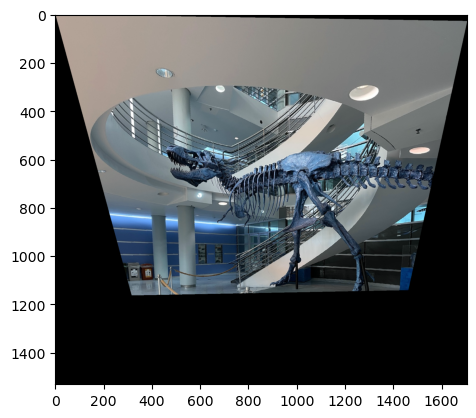

In [6]:
plt.figure()
plt.imshow(warped_im_trex)
plt.show()

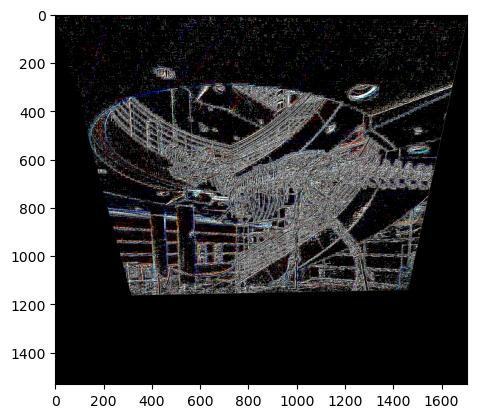

In [156]:
plt.imshow(warped_im_nn - warped_im) # verify

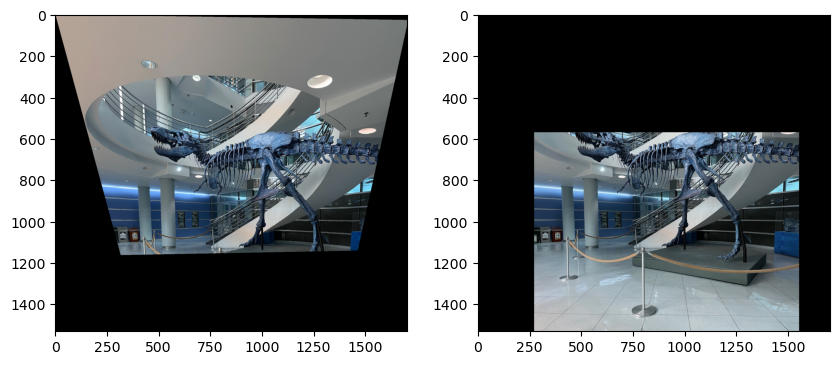

In [61]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
ax1.imshow(warped_im)
ax2.imshow(fixed_im)

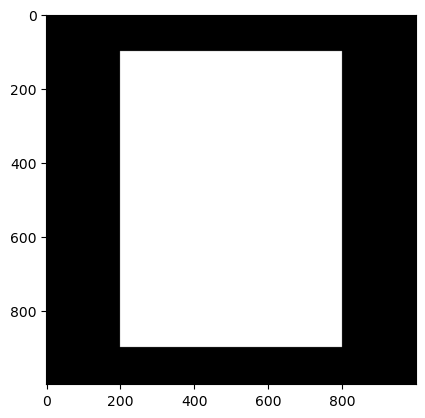

In [40]:
%matplotlib inline

test_rectangle_2 = np.zeros((1000,1000, 3))
test_rectangle_2[100:900, 200:800] = 1
plt.imshow(test_rectangle_2)

In [62]:
%matplotlib inline
map = cv2.imread("images/map.jpeg")
# pts_a, pts_b, A, b, map_h = recover_homographies(map,test_rectangle_2, n_pts=4, save_path="image_results/test_rectangle")
map_h = np.array([ 6.33122537e-01,  6.23764471e-02,  1.26958313e+02, -1.67718775e-01,
        8.84574177e-01,  1.07323796e+02, -2.86603752e-04,  2.20198530e-04,
        1.00000000e+00])
warped_im, fixed_im = warp_bgr_image(map, test_rectangle_2, map_h, "bilinear")


In [120]:
rectangle_tall_pts_b = [(200.73980328061953, 99.8622228112024),
 (199.26735282857726, 899.4028182701652),
 (798.5546868097888, 98.38977235916013),
 (800.0271372618311, 899.4028182701652),
 (199.26735282857726, 101.33467326324467),
 (200.73980328061953, 899.4028182701652),
 (801.4995877138733, 102.80712371528693),
 (800.0271372618311, 900.8752687222075)]
map_pts_a = [(104.62589451364965, 7.340504167034851),
 (74.47010925582367, 1145.721397649969),
 (798.2089554436495, 120.42469888388246),
 (916.9473598963398, 1032.6372029331214),
 (106.5106310922638, 11.109977324263127),
 (76.35484583443781, 1141.9519244927408),
 (794.4394822864213, 120.42469888388246),
 (916.9473598963398, 1036.4066760903497)]
map_h = np.array([ 6.33122537e-01,  6.23764471e-02,  1.26958313e+02, -1.67718775e-01,
        8.84574177e-01,  1.07323796e+02, -2.86603752e-04,  2.20198530e-04,
        1.00000000e+00])

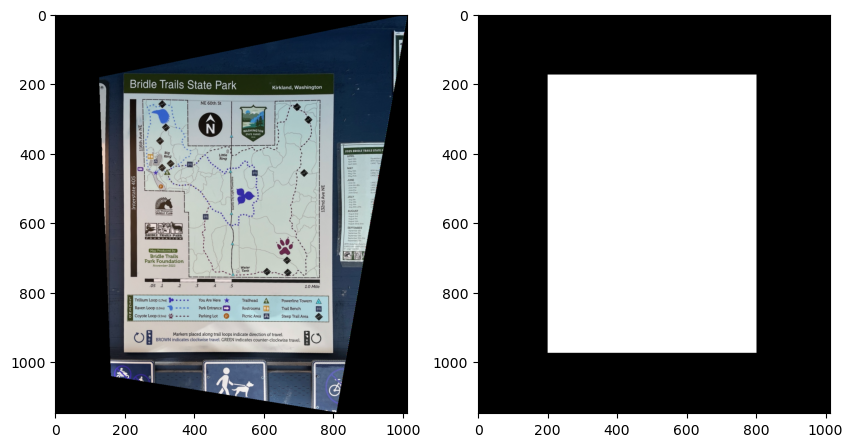

In [152]:
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
ax1.imshow(warped_im)
ax2.imshow(fixed_im*255)

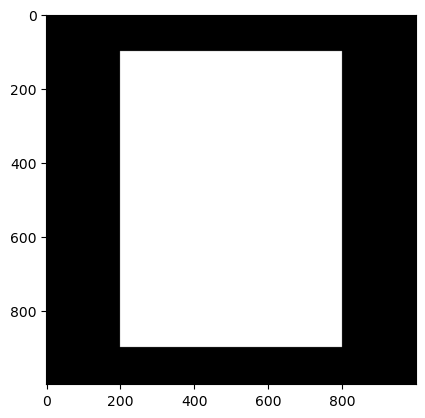

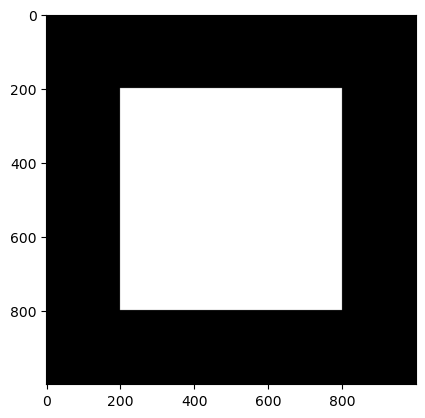

In [5]:
%matplotlib inline

test_rectangle_2 = np.zeros((1000,1000, 3))
test_rectangle_2[100:900, 200:800] = 1
plt.imshow(test_rectangle_2)
plt.show()

In [17]:
map = cv2.imread("images/map.jpeg")


map_pts, rect_2_map_pts, A, b, map_h = recover_homographies(map,test_rectangle_2, n_pts=5, save_path="image_results/map_rect")


In [53]:
rat = cv2.imread("images/rat.jpeg")
rat_pts, rect_2_rat_pts, A, b, rat_h = recover_homographies(rat,test_rectangle_2, n_pts=5, save_path="image_results/rat_rect")

In [54]:
warped_im, fixed_im = warp_bgr_image(rat, test_rectangle_2, rat_h, method="nn")
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
ax1.imshow(warped_im + fixed_im*100)
ax2.imshow(fixed_im*255)
plt.show()

In [50]:
guitar = cv2.imread("images/guitar.jpeg")
guitar_pts, rect_2_guitar_pts, A, b, enclave_h = recover_homographies(guitar,test_rectangle_2, n_pts=5, save_path="image_results/enclave_rect")


In [52]:
warped_im, fixed_im = warp_bgr_image(guitar, test_rectangle_2, enclave_h, method="nn")
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
ax1.imshow(warped_im + fixed_im*100)
ax2.imshow(fixed_im*255)
plt.show()

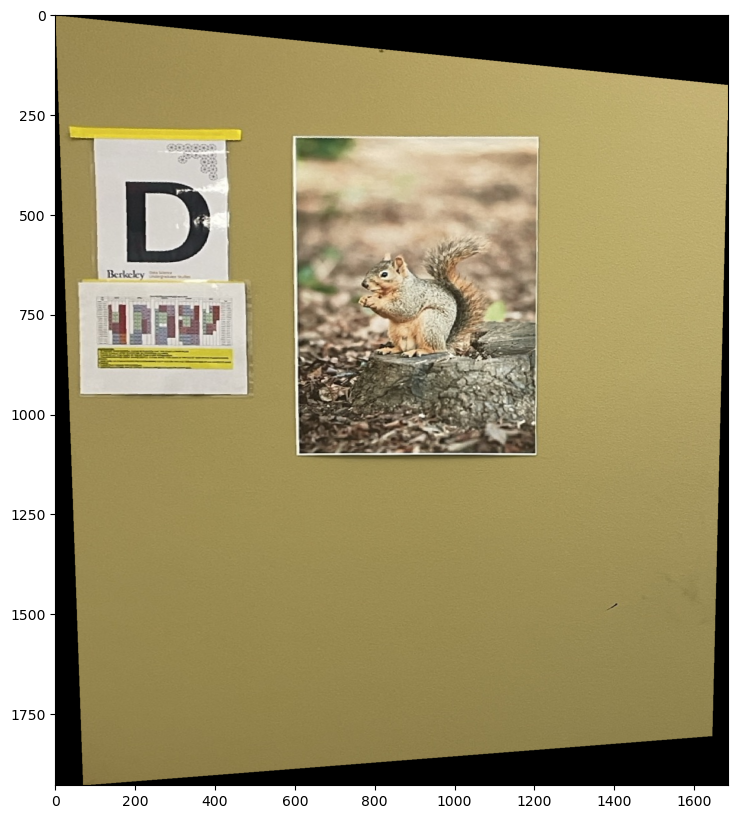

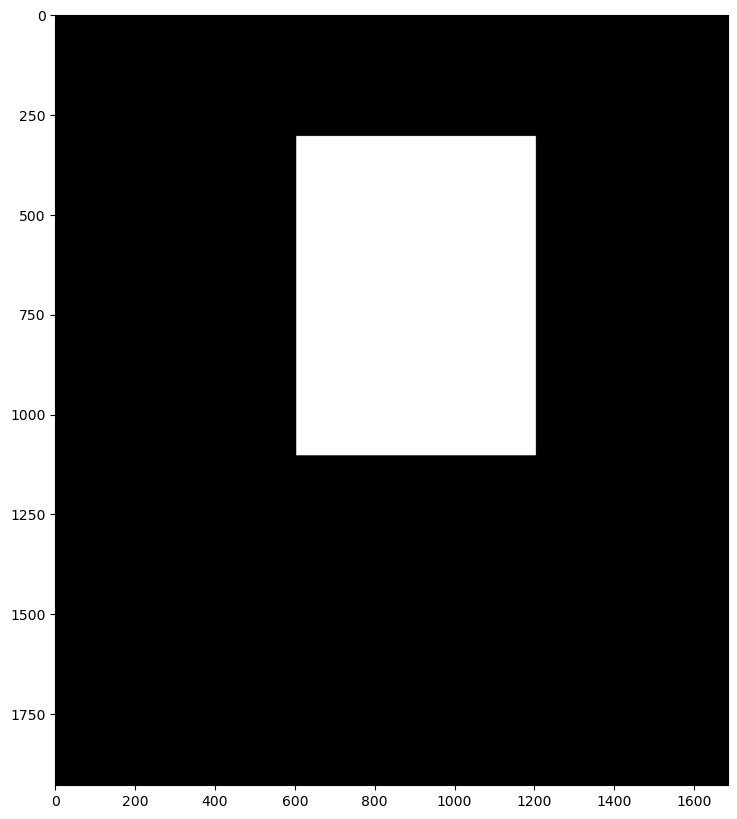

time taken: 26.96548295021057


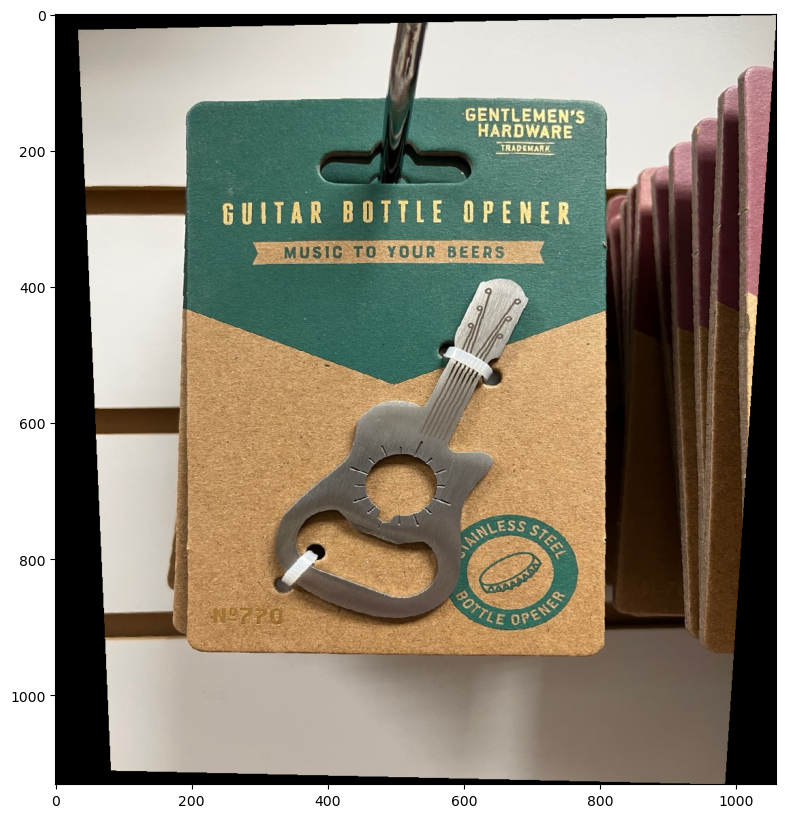

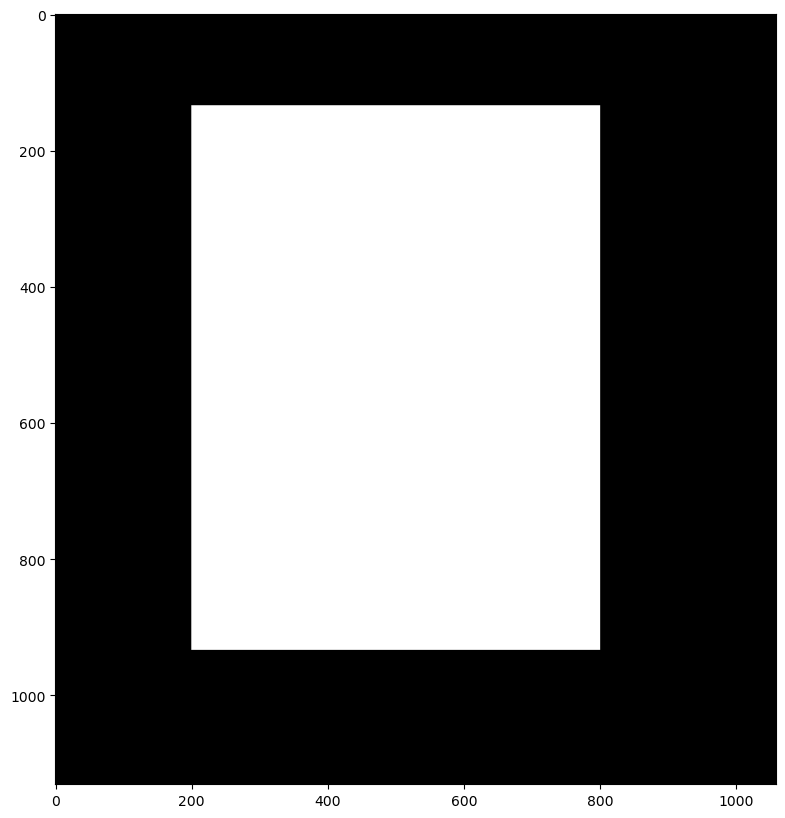

time taken: 9.971949815750122


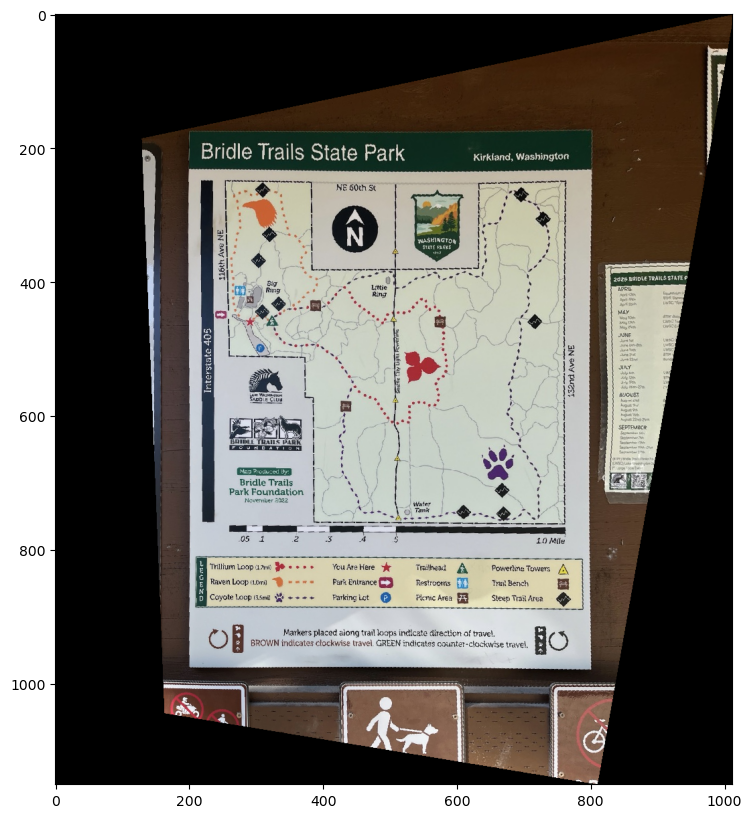

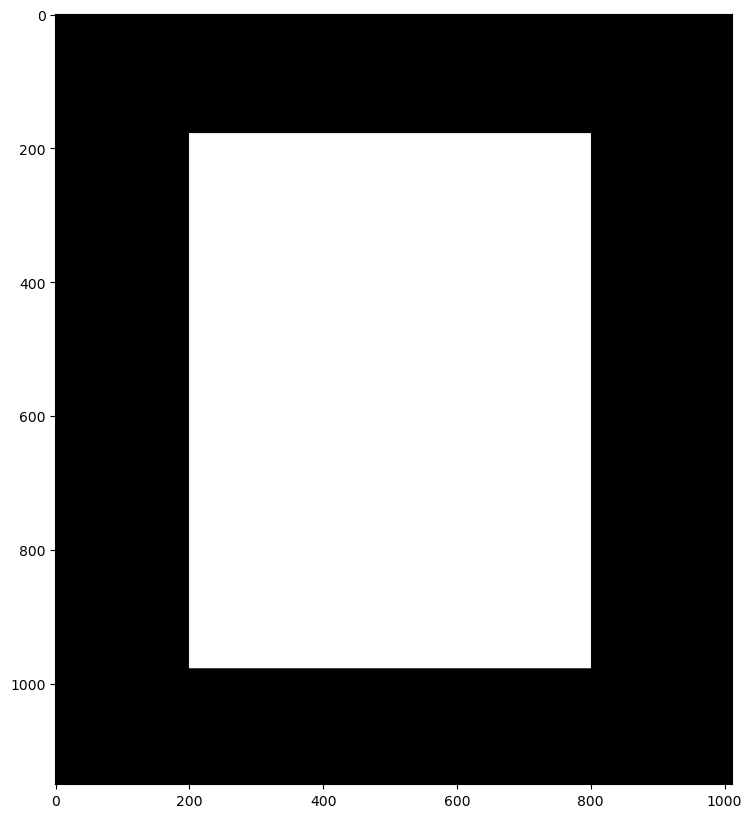

time taken: 8.555346012115479


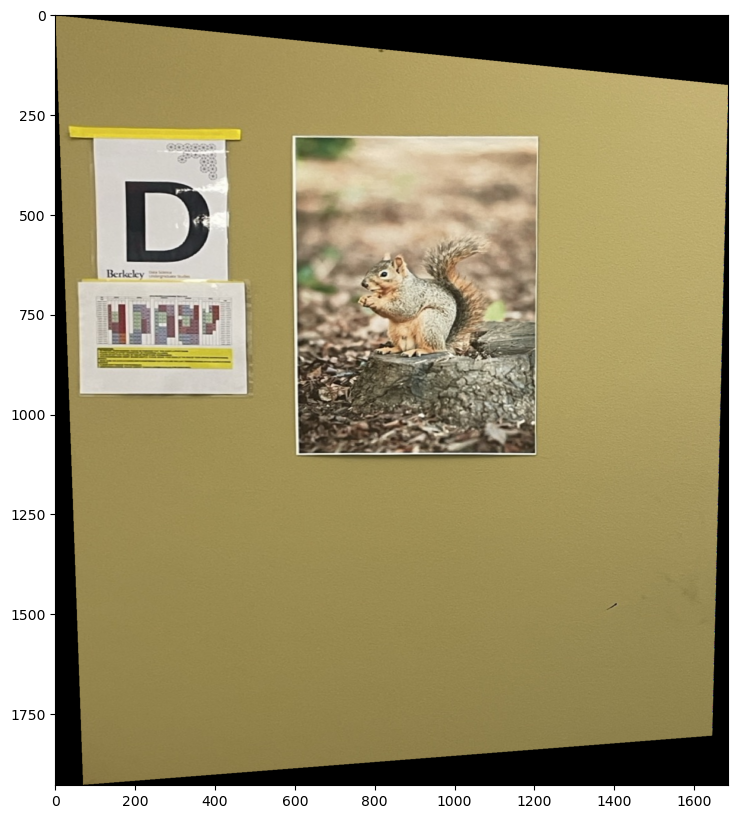

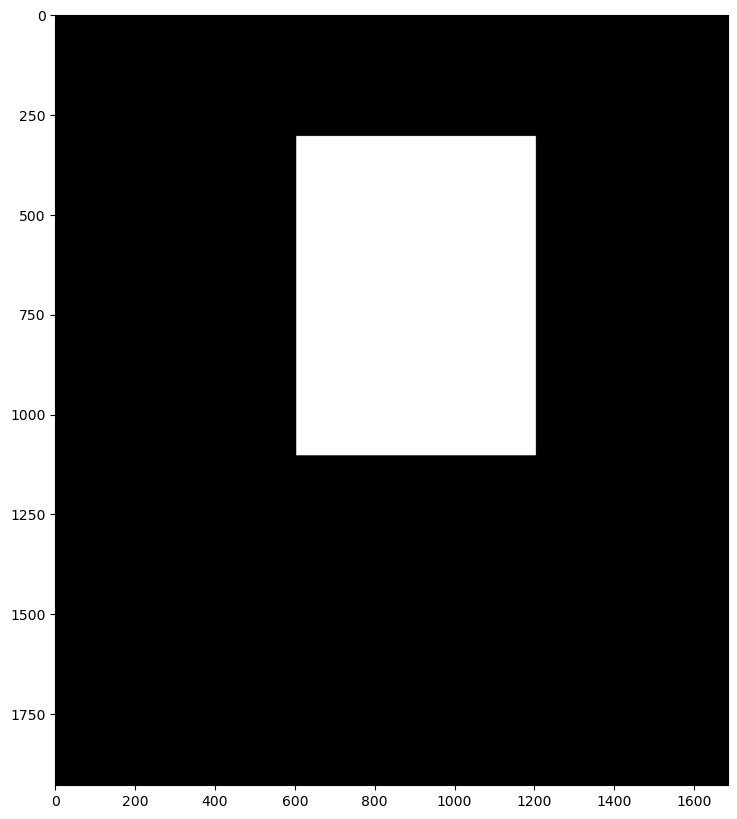

time taken: 80.83407306671143


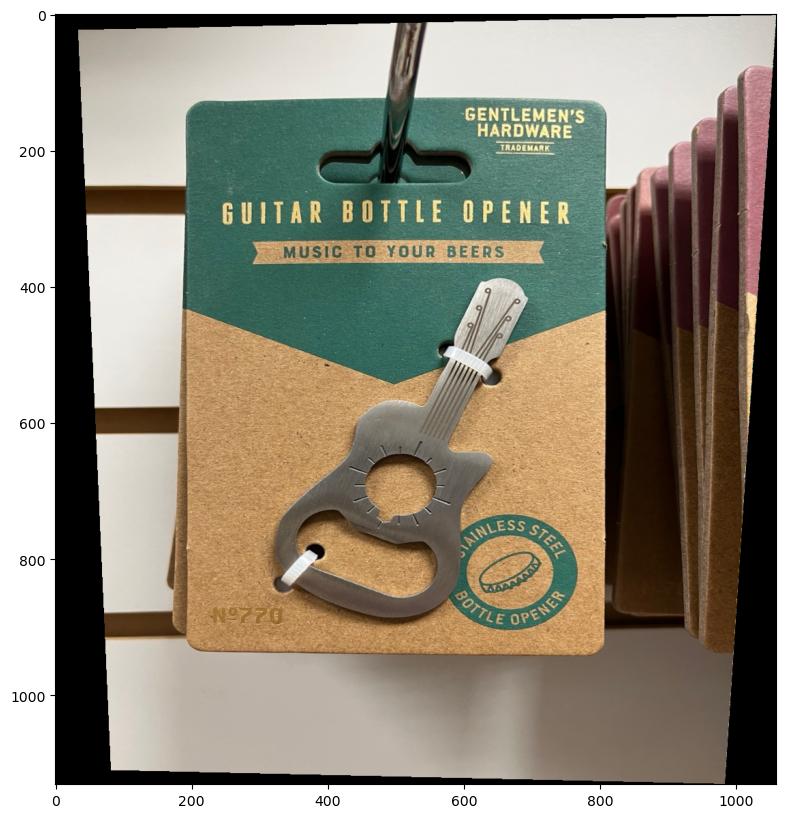

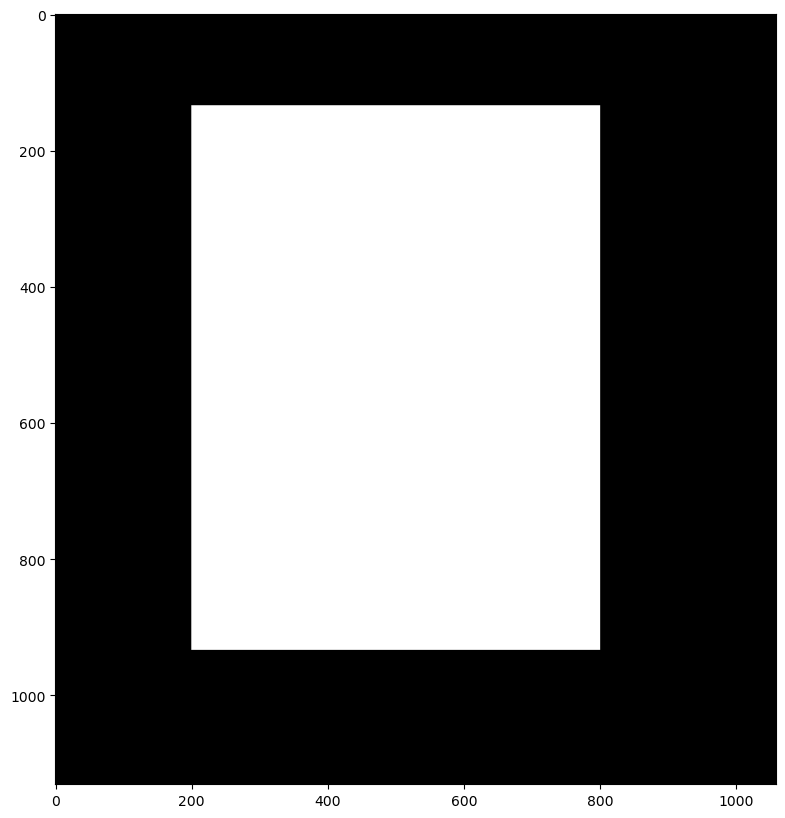

time taken: 29.972025871276855


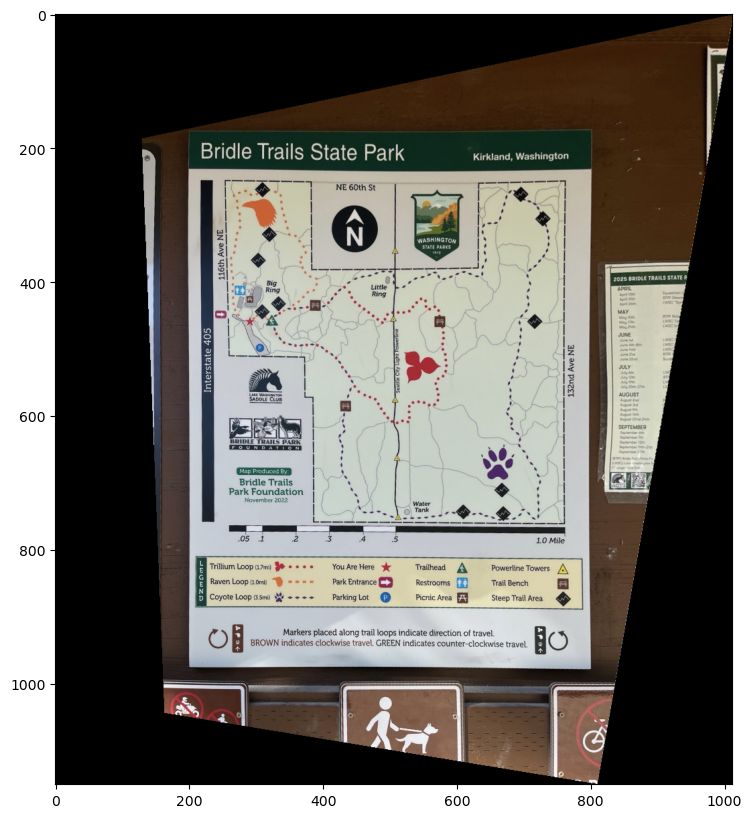

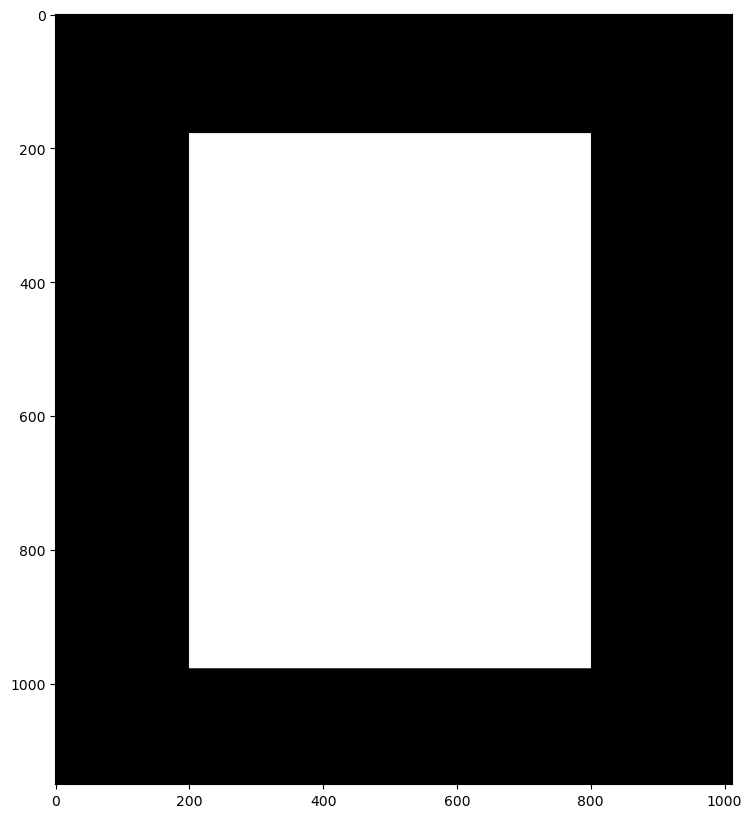

time taken: 22.563884019851685


In [57]:
%matplotlib inline
methods = ["nn", "bilinear"]
ims = [rat, guitar, map]
hs = [rat_h, enclave_h, map_h]
names = ["rat", "guitar", "map"]
for m in methods:
    for i in range(len(ims)):
        start = time.time()
        warped_im, fixed_im = warp_bgr_image(ims[i], test_rectangle_2, hs[i], method=m)

        # fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
        # ax1.imshow(warped_im)
        # ax2.imshow(fixed_im*255)
        # plt.show()
        plt.figure(figsize=(10,10))
        plt.imshow(np.flip(warped_im, axis=2))
        plt.savefig("image_results/" + names[i]+"_" + str(m) + "_rect.jpg", bbox_inches="tight")
        plt.show()
        plt.figure(figsize=(10,10))
        plt.imshow(np.flip(fixed_im*255, axis=2))
        plt.savefig("image_results/" + names[i]+"_canon_" + str(m) + "_rect.jpg", bbox_inches="tight")
        plt.show()
        print("time taken:", time.time() - start)


# A.4

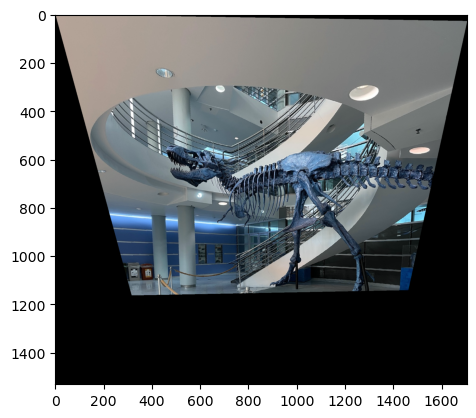

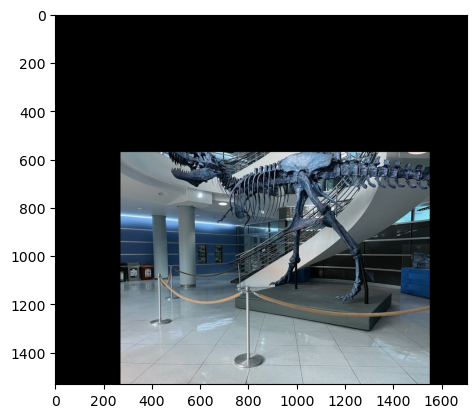

In [7]:
plt.imshow(warped_im_trex)
plt.show()
plt.imshow(fixed_im_trex)
plt.show()

In [7]:
import scipy.signal as sc

def laplacian_stack(img, kernel_size, num_layers):

    laplace_layers = []

    kernel = cv2.getGaussianKernel(ksize=kernel_size, sigma=kernel_size/6)
    kernel_2d = np.outer(kernel, kernel.T)

    def laplacian_stack_helper(img, remaining_iter):
        if remaining_iter == 0:
            img_blurred = sc.convolve2d(img, kernel_2d, mode="same")
            laplace_layers.append(img - img_blurred)
            return img_blurred
        
        img_blurred = sc.convolve2d(img, kernel_2d, mode="same")

        laplace_layers.append(img - img_blurred)

        last_layer = laplacian_stack_helper(img_blurred, remaining_iter-1)
        return last_layer

    last_layer = laplacian_stack_helper(img, remaining_iter=num_layers-1)
    return laplace_layers, last_layer


def gaussian_stack(img, kernel_size, num_layers):

    layers = []

    kernel = cv2.getGaussianKernel(ksize=kernel_size, sigma=kernel_size/6)
    kernel_2d = np.outer(kernel, kernel.T)

    def gaussian_stack_helper(img, remaining_iter):
        if remaining_iter == 0:
            img_blurred = sc.convolve2d(img, kernel_2d, mode="same", boundary="symm")
            return img_blurred
        
        img_blurred = sc.convolve2d(img, kernel_2d, mode="same", boundary="symm")

        layers.append(img_blurred)

        last_layer = gaussian_stack_helper(img_blurred, remaining_iter-1)
        return last_layer

    last_layer = gaussian_stack_helper(img, remaining_iter=num_layers-1)
    layers.append(last_layer)
    return layers


def blend_bgr_image_2(bgr_1, bgr_2, mask, num_layers, kernel_size, kernel_size_mask):
    mask_layers = gaussian_stack(mask, kernel_size=kernel_size_mask, num_layers=num_layers+1)

    layers_1, last_1 = laplacian_stack_bgr(bgr_1, kernel_size, num_layers)
    layers_2, last_2 = laplacian_stack_bgr(bgr_2, kernel_size, num_layers)

    output_images = []
    blended_layers = []

    n_layers = min(len(layers_1), len(layers_2), len(mask_layers))
    for i in range(n_layers):
        Lk_bgr = []
        lhs_bgr = []
        rhs_bgr = []        
        for c in range(3):
            c1 = layers_1[i][:,:,c]
            c2 = layers_2[i][:,:,c]

            lhs = c1 * mask_layers[i]
            lhs_bgr.append(lhs)

            rhs = c2 * (1-mask_layers[i])
            rhs_bgr.append(rhs)

            Lk = lhs + rhs
            Lk_bgr.append(Lk)
            
        layer_img = np.dstack(Lk_bgr)
        blended_layers.append(layer_img)
        output_images.append(layer_img)
        output_images.append(np.dstack(rhs_bgr))
        output_images.append(np.dstack(lhs_bgr))

    Lk_bgr = [] 
    lhs_bgr = []
    rhs_bgr = []  
    for c in range(3):
        c1 = last_1[:,:,c]
        c2 = last_2[:,:,c]
        lhs = c1 * mask_layers[i]
        lhs_bgr.append(lhs)

        rhs = c2 * (1-mask_layers[i])
        rhs_bgr.append(rhs)

        Lk = lhs + rhs
        Lk_bgr.append(Lk)

    layer_img = np.dstack(Lk_bgr)
    blended_layers.append(layer_img)
    output_images.append(layer_img)
    output_images.append(np.dstack(rhs_bgr))
    output_images.append(np.dstack(lhs_bgr))

    blend_img = sum(blended_layers)
    blend_img = np.clip(blend_img, a_min=0, a_max=255).astype(np.uint8)
    return blend_img, output_images

def laplacian_stack_bgr(img, kernel_size, num_layers):

    laplace_layers = []

    def laplacian_stack_helper(img, remaining_iter):
        if remaining_iter == 0:
            img_blurred = blur_bgr_image(img, kernel_size, kernel_size/6)
            laplace_layers.append(img - img_blurred)
            return img_blurred
        
        img_blurred = blur_bgr_image(img, kernel_size, kernel_size/6)

        layer = img - img_blurred
        laplace_layers.append(layer)

        last_layer = laplacian_stack_helper(img_blurred, remaining_iter-1)
        return last_layer

    last_layer = laplacian_stack_helper(img, remaining_iter=num_layers-1)
    return laplace_layers, last_layer


def blur(img, kernel_size, sigma):
    kernel = cv2.getGaussianKernel(ksize=kernel_size, sigma=sigma)
    kernel_2d = np.outer(kernel, kernel.T)

    img = sc.convolve2d(img, kernel_2d, mode="same", boundary="symm")
    return img

def blur_bgr_image(bgr_img, kernel_size, sigma):
    blurred_channels = []
    for i in range(3):
        channel = bgr_img[:,:,i]
        blurred = blur(channel, kernel_size=kernel_size, sigma=sigma)
        blurred_channels.append(blurred)
    img = np.dstack(blurred_channels)
    return img

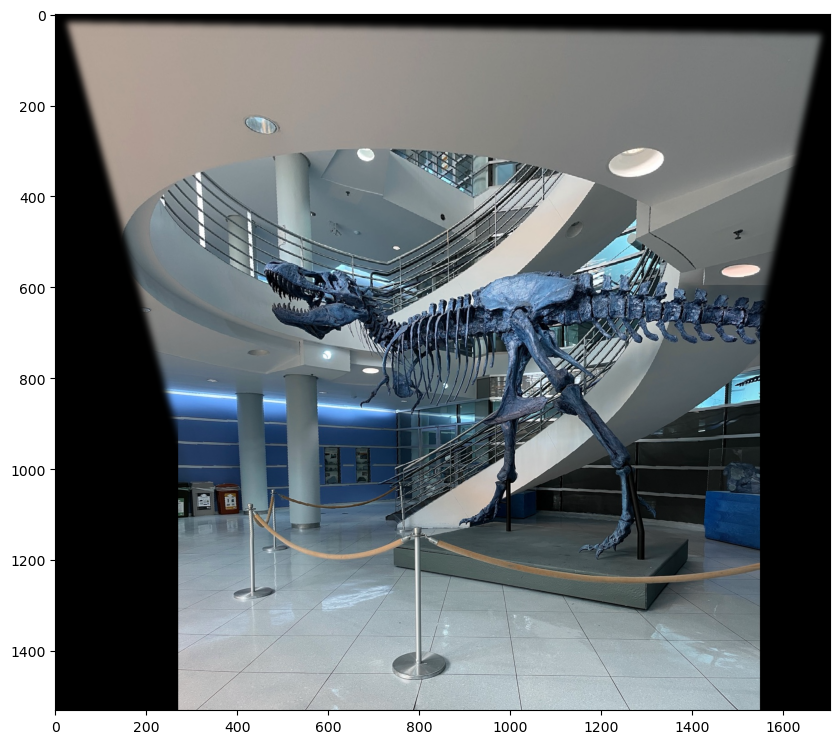

In [8]:
trex_blend, layers = blend_bgr_image_2( warped_im_trex, fixed_im_trex, trex_mask_generated, num_layers=2, kernel_size=10, kernel_size_mask=30)
plt.figure(figsize=(10,10))
plt.imshow(trex_blend)

In [5]:
%matplotlib inline
im_fixed = cv2.imread("images/trex_1.jpeg")
im_to_warp = cv2.imread("images/trex_2.jpeg")

name = "trex"

sf_h = np.array([ 8.63532725e-01, -2.07752133e-01,  1.04041014e+02, -1.87120640e-02,
        6.82761256e-01,  3.89922255e+02, -2.95040367e-05, -3.20807426e-04,
        1.00000000e+00])

pts_a, pts_b, A, b, recovered_h = recover_homographies(im_to_warp,im_fixed, n_pts=8, save_path="image_results/" + name)

warped_im, fixed_im, mask_generated = warp_bgr_image(im_to_warp, im_fixed, recovered_h, method="nn")

plt.figure()
plt.imshow(np.flip(warped_im, axis=2))
plt.savefig("image_results/" + name+"_warped"  + ".jpg", bbox_inches="tight")
plt.show()

plt.figure()
plt.imshow(np.flip(fixed_im, axis=2))
plt.savefig("image_results/" + name+"_fixed"  + ".jpg", bbox_inches="tight")
plt.show()

blend_img, layers = blend_bgr_image_2( warped_im, fixed_im, mask_generated, num_layers=2, kernel_size=10, kernel_size_mask=30)

plt.figure(figsize=(10,10))
plt.imshow(np.flip(blend_img, axis=2))
plt.savefig("image_results/" + name+"_blended"  + ".jpg", bbox_inches="tight")
plt.show()

In [228]:
sf_pts_a = [(512.7274685870973, 440.00019585982477),
 (460.1201961304001, 546.7709603321848),
 (339.96823924374934, 351.7007244456224),
 (423.3678328474246, 375.7311158229526),
 (701.8376623376621, 128.35943987984808),
 (587.3399151868537, 193.3828518420355),
 (1005.7514356391905, 196.2099567099567),
 (453.05243396059706, 459.13070942662785)]

sf_pts_b = [(539.2791324321936, 806.8646081809347),
 (478.4963777718878, 929.8436699355067),
 (369.6528403569219, 712.1565951055748),
 (453.05243396059706, 734.7734340489442),
 (728.6951585829133, 495.8830727096033),
 (619.8516211679475, 553.8387225019878),
 (1026.9547221485993, 556.665827369909),
 (475.6692729039666, 829.4814471243042)]

sf_h = np.array([ 8.63532725e-01, -2.07752133e-01,  1.04041014e+02, -1.87120640e-02,
        6.82761256e-01,  3.89922255e+02, -2.95040367e-05, -3.20807426e-04,
        1.00000000e+00])


# A.5

In [79]:
def transform_mosaic_fish(im, f):

    s = f

    height = im.shape[0]
    width = im.shape[1]

    # get bounding box
    # top left, top right, bottom left, bottom right
    corners = np.array([[0,0], [width-1, 0], [0, height-1], [width-1, height-1]])

    # find boundary values
    x_boundary = [x[0] for x in corners]
    y_boundary = [x[1] for x in corners]

    min_y, min_x = np.floor(min(y_boundary)), np.floor(min(x_boundary))
    max_y, max_x = np.ceil(max(y_boundary)), np.ceil(max(x_boundary))

    i_range = int(np.ceil(max_y) - np.floor(min_y)) + 1
    j_range = int(np.ceil(max_x) - np.floor(min_x)) + 1

    output_img = np.zeros((i_range, j_range))
    # homography matrix does coordinates in x,y,1 order

    for i in range(i_range):
        for j in range(j_range):
            coord = [j+min_x,i+min_y,1]
            # do interpolation here
            # add an extra mapping step before we back-calculate it using the homography
            # recalculate coordinate relative to center
            center_y, center_x = 1/2 * i_range, 1/2 * j_range
            x_prime = coord[0] - center_x
            y_prime = coord[1] - center_y

            x = f*np.tan((x_prime/s))
            y = (y_prime/s) * np.sqrt(x**2 + f**2)
            coord = [x+center_x,y+center_y,1]

            # nearest neighbor: round the pixel to the nearest integer value
            x, y = [int(np.floor(coord[0])), int(np.floor(coord[1]))]
            if (0 <= x < width) and (0 <= y < height):
                output_img[i,j] = im[y, x]

    return output_img, (min_x, min_y, max_x, max_y)

def cylinder_forward(s, x, y):
    return s * np.tan(x/s), s * y/(np.sqrt(x**2 + y**2))

def transform_bgr_mosaic_fish(im, f):
    output_img = []
    for i in range(im.shape[2]):
        channel = im[:,:,i]
        output =  transform_mosaic_fish(channel, f=f)
        output_img.append(output)
    return np.dstack([x[0].astype(np.uint8) for x in output_img])

In [126]:
trex_gray = img = cv2.cvtColor(trex_blend, cv2.COLOR_BGR2GRAY)
fish_trex = transform_bgr_mosaic_fish(trex_blend, f=1000)

In [127]:
fish_trex.shape

(1531, 1705, 3)

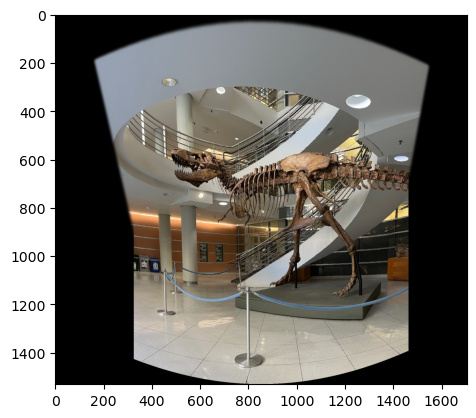

In [128]:
plt.imshow(np.flip(fish_trex, axis=2))

In [10]:
def warp_image_fish_inverse(im, im_fixed, H, f):
    
    H = np.array(H)
    H = H.reshape(3,3)
    H_inv = np.linalg.inv(H)

    height = im.shape[0]
    width = im.shape[1]

    s = f

    # get bounding box
    # top left, top right, bottom left, bottom right
    corners = np.array([[0,0,1], [width-1, 0, 1], [0, height-1, 1], [width-1, height-1, 1]])

    bounding_box = []
    for c in corners:
        transformed_corner = np.matmul(H, c)
        bounding_box.append(transformed_corner / transformed_corner[2])

    # find boundary values
    x_boundary = [x[0] for x in bounding_box]
    y_boundary = [x[1] for x in bounding_box]

    min_y, min_x = np.floor(min(y_boundary)), np.floor(min(x_boundary))
    max_y, max_x = np.ceil(max(y_boundary)), np.ceil(max(x_boundary))

    i_range = int(np.ceil(max_y) - np.floor(min_y))
    j_range = int(np.ceil(max_x) - np.floor(min_x))

    #====== determine full mosaic size here
    height_fixed = im_fixed.shape[0]
    width_fixed = im_fixed.shape[1]

    # get size of bounding box for both img
    min_x_all = np.floor(min(0, min_x))
    min_y_all = np.floor(min(0, min_y)) 
    max_x_all = np.ceil(max(width_fixed, max_x))
    max_y_all = np.ceil(max(height_fixed, max_y))

    i_range_full = int(max_y_all - min_y_all)
    j_range_full = int(max_x_all - min_x_all)

    #======= back to it

    output_img = np.zeros((i_range, j_range))
    # homography matrix does coordinates in x,y,1 order

    fixed_fish = fish_warp_fixed(im_fixed, min_y_all, min_x_all, i_range_full, j_range_full, f=f)

    for i in range(i_range):
        for j in range(j_range):
            coord = [j+min_x,i+min_y,1]
            
            center_y, center_x = 1/2 * i_range_full, 1/2 * j_range_full
            x_prime = coord[0] - center_x
            y_prime = coord[1] - center_y

            x = f*np.tan((x_prime/s))
            y = (y_prime/s) * np.sqrt(x**2 + f**2)
            coord = [x+center_x,y+center_y,1]

            back_coord = np.matmul(H_inv, coord)
            rounded_coord = back_coord/back_coord[2]

            # nearest neighbor: round the pixel to the nearest integer value
            x, y = [int(np.floor(rounded_coord[0])), int(np.floor(rounded_coord[1]))]
            if (0 <= x < width) and (0 <= y < height):
                output_img[i,j] = im[y, x]
                
    return output_img, fixed_fish, (min_x, min_y, max_x, max_y)

def fish_warp_fixed(im, min_y_all, min_x_all, i_range_full, j_range_full, f):

    height = im.shape[0]
    width = im.shape[1]

    s = f

    # get bounding box
    # top left, top right, bottom left, bottom right
    corners = np.array([[0,0], [width-1, 0], [0, height-1], [width-1, height-1]])

    # find boundary values
    x_boundary = [x[0] for x in corners]
    y_boundary = [x[1] for x in corners]

    min_y, min_x = np.floor(min(y_boundary)), np.floor(min(x_boundary))
    max_y, max_x = np.ceil(max(y_boundary)), np.ceil(max(x_boundary))

    i_range = int(np.ceil(max_y) - np.floor(min_y))
    j_range = int(np.ceil(max_x) - np.floor(min_x))

    x_offset_fixed = int(-min_x_all)
    y_offset_fixed = int(-min_y_all)

    output_img = np.zeros((i_range, j_range))
    # homography matrix does coordinates in x,y,1 order

    for i in range(i_range):
        for j in range(j_range):
            coord = [j,i,1]
            
            center_y, center_x = 1/2 * i_range_full, 1/2 * j_range_full
            x_prime = coord[0] - center_x
            y_prime = coord[1] - center_y 

            x = f*np.tan((x_prime/s))
            y = (y_prime/s) * np.sqrt(x**2 + f**2)
            coord = [x+center_x,y+center_y,1]

            # nearest neighbor: round the pixel to the nearest integer value
            x, y = [int(np.floor(coord[0])), int(np.floor(coord[1]))]
            if (0 <= x < width) and (0 <= y < height):
                output_img[i,j] = im[y, x]
                
    return output_img

def warp_bgr_image_fish_inverse(bgr_im_to_warp, fixed_im, H, f):
    aligned_im = []
    mask = []

    for i in range(bgr_im_to_warp.shape[2]):
        channel = bgr_im_to_warp[:,:,i]
        fixed_channel = fixed_im[:,:,i]
        output, fixed_fish, corners = warp_image_fish_inverse(channel, fixed_channel, H, f=f)
        alignment = place_images_fish(fixed_fish, output, corners[0], corners[1], corners[2], corners[3])
        mask.append(alignment[-1])
        alignment = alignment[:-1]
        aligned_im.append(alignment)

    masks = sum(mask)
    masks[masks >= 1] = 1
    masks[masks < 1] = 0
    warped_channels = [x[0] for x in aligned_im]
    fixed_channels = [x[1] for x in aligned_im]
    warped_stack = np.dstack([x.astype(np.uint8) for x in warped_channels])
    fixed_stack = np.dstack([x.astype(np.uint8) for x in fixed_channels])

    #warped_fixed = transform_bgr_mosaic_fish(fixed_stack, f=f)

    return warped_stack, fixed_stack, masks


def place_images_fish(im_fixed, im_warped, min_x, min_y, max_x, max_y):
    height = im_fixed.shape[0]
    width = im_fixed.shape[1]

    height2 = im_warped.shape[0]
    width2 = im_warped.shape[1]

    # get size of bounding box for both img
    min_x_all = np.floor(min(0, min_x))
    min_y_all = np.floor(min(0, min_y)) 
    max_x_all = np.ceil(max(width, max_x))
    max_y_all = np.ceil(max(height, max_y))

    # canvas needs to be large enough to hold both images so i can place them and tell if theyre warped right or im going crazy
    i_range = int(max_y_all - min_y_all)
    j_range = int(max_x_all - min_x_all)

    # put im1
    x_offset_fixed = int(-min_x_all)
    y_offset_fixed = int(-min_y_all)
    
    im_fixed_placed = np.zeros((i_range, j_range))
    im_fixed_placed[y_offset_fixed:y_offset_fixed+height, x_offset_fixed:x_offset_fixed+width] = im_fixed

    # put im2_warped
    x_offset_warped = int(np.floor(min_x) - min_x_all)
    y_offset_warped = int(np.floor(min_y) - min_y_all)

    im_warped_placed = np.zeros((i_range, j_range))
    im_warped_placed[y_offset_warped:y_offset_warped+height2, x_offset_warped:x_offset_warped+width2] = im_warped

    #mask = make_mask_on_fixed_fish((i_range, j_range), height, width, x_offset_fixed, y_offset_fixed)
    mask = make_mask_on_fixed_fish(im_warped_placed)

    return im_warped_placed, im_fixed_placed, mask


In [55]:
trex_high = cv2.imread("images/trex_2.jpeg")
trex_low = cv2.imread("images/trex_1.jpeg")

#pts_a, pts_b, A, b, recovered_h = recover_homographies(trex_high,trex_low, n_pts=8, save_path="image_results/cylinder_" + name)

trex_fish, trex_fixed, mask = warp_bgr_image_fish_inverse(trex_high, trex_low, trex_h, f = 1000)

In [56]:
trex_fish.shape, trex_fixed.shape

((1530, 1705, 3), (1530, 1705, 3))

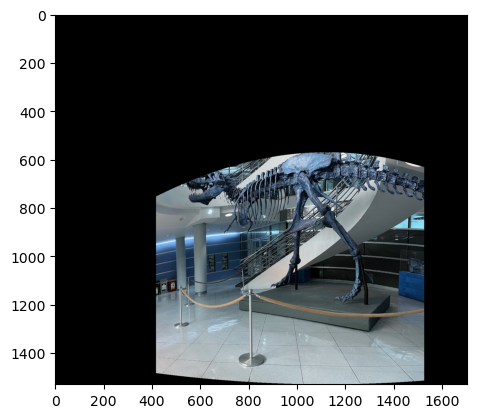

In [57]:
%matplotlib inline
plt.imshow(trex_fixed)

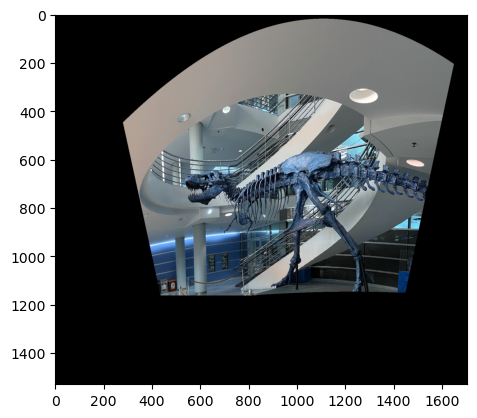

In [58]:
plt.imshow(trex_fish)

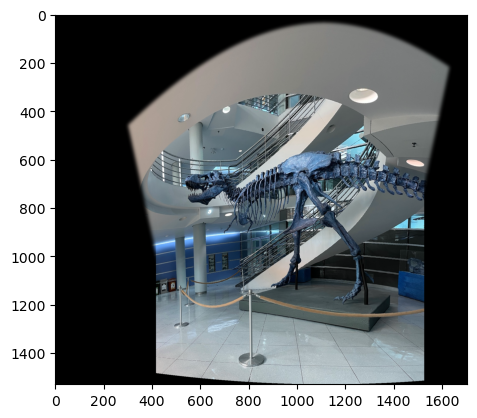

In [59]:
trex_blend, layers = blend_bgr_image_2(trex_fish, trex_fixed, mask, num_layers=2, kernel_size=10, kernel_size_mask=30)
plt.imshow(trex_blend)

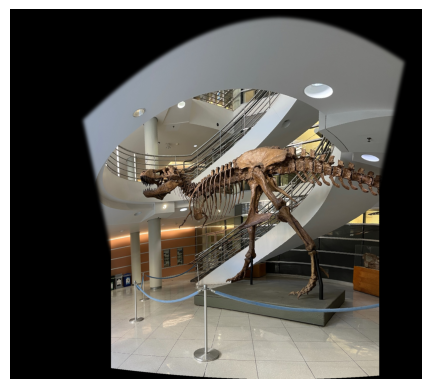

In [61]:
plt.imshow(np.flip(trex_blend,axis=2))
plt.axis('off')
plt.savefig("image_results/" + name+"_cylinder"  + ".jpg", bbox_inches="tight")